<a href="https://colab.research.google.com/github/Yashaswini944/customer-churn-prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

sns.set(style='whitegrid')


In [2]:
#Load the Dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Basic Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
#drop customerID(not useful for ML because it contains no predictive information)
if 'customerID' in df.columns:
 df.drop('customerID', axis=1, inplace=True)

In [61]:
#convert TotalChangers to numeric
#because some rows contain ""(spaces)
#This will convert them to NaN so we can clean them
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
#check missing values again
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [8]:
#handle missing values(Drop missing rows)
df.dropna(inplace=True)

In [12]:
#clean categorical values
replace_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

for col in replace_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [13]:
#verify
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Encode the target cloumn(churn)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [15]:
#identify categorical columns(this will show all columns that still contain text)
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [16]:
#One-Hot Encode categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [17]:
#verifying
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Churn                                  7032 non-null   int64  
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

**No object columns**

**All feature numeric**

**Many new 0/1 columns**

**Target column CHurn is 0/1**

In [19]:
#Seperate Features and Target
x = df.drop('Churn', axis=1)
y = df['Churn']

**x contains all input features**

**y contains the label we want to predict**

In [22]:
#Train Test Split
#test_size=0.2--->20% test data
#random_state=42-->reproducibility
#stratify=y-->keeps churn ratio the same in train and test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
#identify and Scale Numeric Features

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

**Why scale?**

Puts all numeric features
on similar ranges

Prevents large‑range features from dominating

Helps gradient‑based models converge faster

Improves performance for distance‑based models

In [24]:
#verification
x_train.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,0,1.321816,0.981556,1.659900,True,True,True,True,True,True,...,True,True,False,False,False,True,False,True,False,False
7003,0,-0.267410,-0.971546,-0.562252,True,False,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
3355,0,1.444064,0.837066,1.756104,False,True,False,True,True,True,...,True,True,False,False,False,True,False,True,False,False
4494,0,-1.204646,0.641092,-0.908326,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
3541,0,0.669826,-0.808787,-0.101561,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [25]:
#check class imbalance
y_train.value_counts(normalize=True)

,proportion
Churn,
0,0.734222
1,0.265778


In [26]:
#Apply SMOTE(Oversampling Minority Class)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [27]:
#verify New Balance Distribution
y_train_smote.value_counts()

,count
Churn,
0,4130
1,4130


In [30]:
#Train baseline Models
#Logistic Regression(with SMOTE data)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(x_train_smote, y_train_smote)

y_pred_lr = log_reg.predict(x_test)
y_pred_lr_proba = log_reg.predict_proba(x_test)[:, 1]

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr_proba))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407

ROC-AUC: 0.8223245207613978


**Why SMOTE for Logistic Regression?**

Because logistic regression is sensitive to class imbalance.

Balanced data → better decision boundary.

In [32]:
#Random Forest(with class weights)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_pred_rf_proba = rf.predict_proba(x_test)[:, 1]

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_proba))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407

ROC-AUC: 0.8212153998270962


**Why class_weight='balanced'?**

It automatically adjusts weights so the model pays more attention to churners.

In [34]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
y_pred_gb_proba = gb.predict_proba(x_test)[:, 1]

print("Gradient Boosting Results:")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_gb_proba))


Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC-AUC: 0.8406748424970623


**Why Gradient Boosting?**

It builds trees sequentially, correcting mistakes from previous trees.
Often performs extremely well on tabular data.

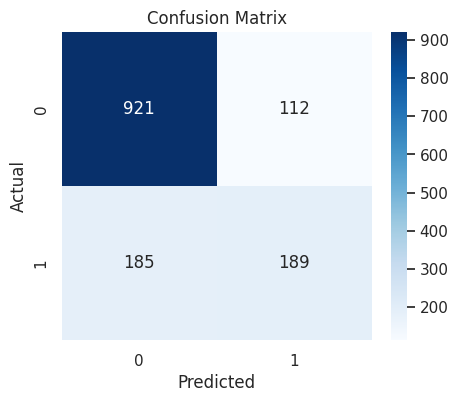

In [67]:
#Confusion Matrix Function (Reusable)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Generate predictions
y_pred = best_gb.predict(x_test)

# Plot
plot_conf_matrix(y_test, y_pred, "Confusion Matrix")



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.73      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



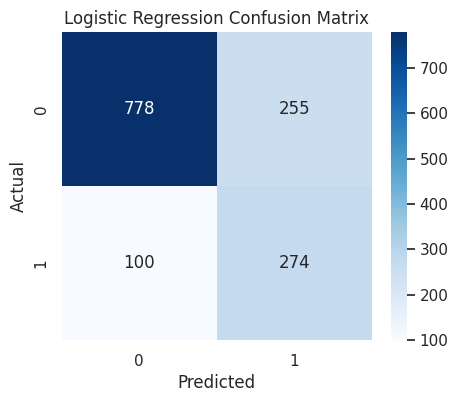

ROC-AUC: 0.8223245207613978


In [38]:
#Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")

print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr_proba))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



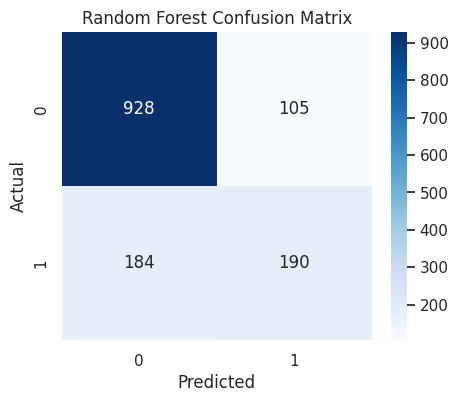

ROC-AUC: 0.8212153998270962


In [39]:
#Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf_proba))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



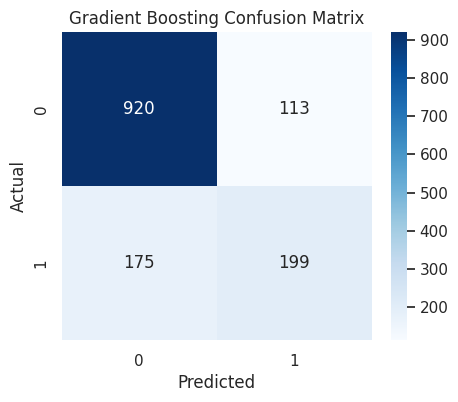

ROC-AUC: 0.8406748424970623


In [40]:
#Evaluate Gradient Boosting
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

plot_conf_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")

print("ROC-AUC:", roc_auc_score(y_test, y_pred_gb_proba))


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [2, 3],
}

gb_model = GradientBoostingClassifier()

gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_params,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

gb_grid.fit(x_train, y_train)

print("Best Gradient Boosting Parameters:")
print(gb_grid.best_params_)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Gradient Boosting Parameters:
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}


In [51]:
#Evaluate Tuned Gradient Boosting
best_gb = gb_grid.best_estimator_

y_pred_best_gb = best_gb.predict(x_test)
y_pred_best_gb_proba = best_gb.predict_proba(x_test)[:, 1]

print("Tuned Gradient Boosting Results:")
print(classification_report(y_test, y_pred_best_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_best_gb_proba))


Tuned Gradient Boosting Results:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC-AUC: 0.8414138250565562


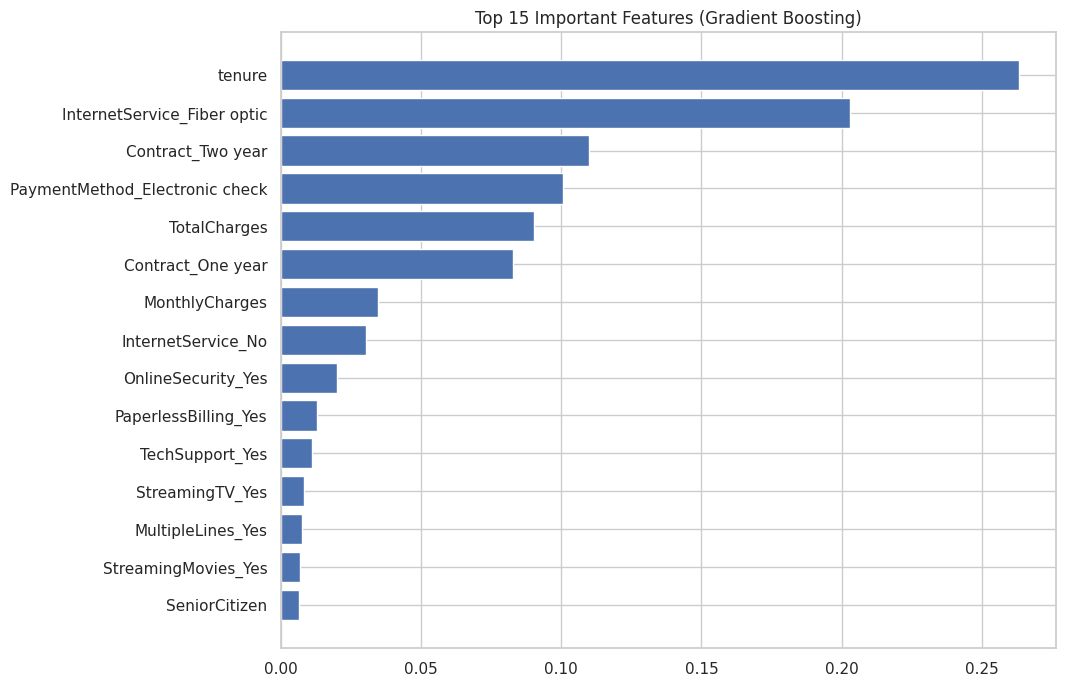

In [53]:
#Feature Importance(using Gradient Boosting)
import pandas as pd
import matplotlib.pyplot as plt

importances = best_gb.feature_importances_
features = x_train.columns

feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,8))
plt.barh(feat_imp['Feature'][:15], feat_imp['Importance'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features (Gradient Boosting)")
plt.show()


In [74]:
import pickle

with open("churn_model.pkl", "rb") as f:
    model = pickle.load(f)
